In [1]:
import os
import sys
import pandas as pd

from torchvision import transforms

sys.path.insert(0, "..\\Scripts")

from ImageDatastore import ImageDatastore
from Segmentation import ImageSegmentation

In [2]:
transform = transforms.Compose(
    [
        transforms.Resize(
            (232, 232), interpolation=transforms.InterpolationMode.BILINEAR
        ),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [ ]:
train_small = ImageDatastore("train", transform=transform)

In [4]:
df = train_small.labels
df.head()

,Image,Label
0,train_059371.jpg,0
1,train_059389.jpg,0
2,train_059425.jpg,0
3,train_059445.jpg,0
4,train_059516.jpg,0


In [5]:
image_segmentation = ImageSegmentation()

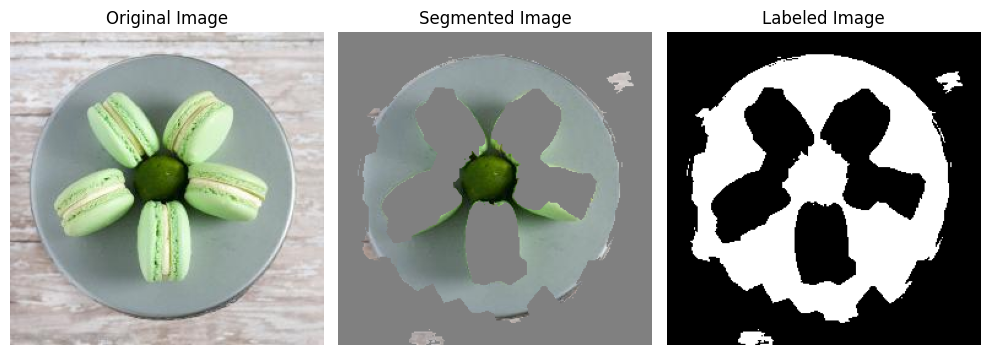

In [ ]:
path = os.path.join("..", "Dataset", "train_small", df.Image[2])
segmented, labeled_image = image_segmentation.segment_image(path)

In [34]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

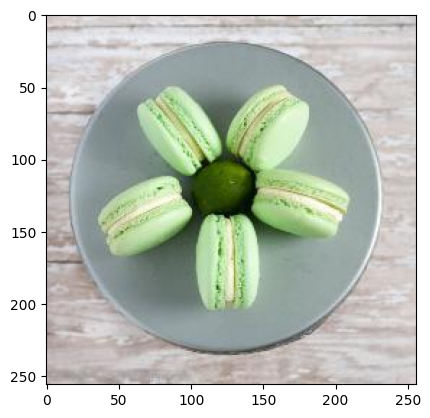

In [35]:
original_image = cv2.imread(path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
plt.show()

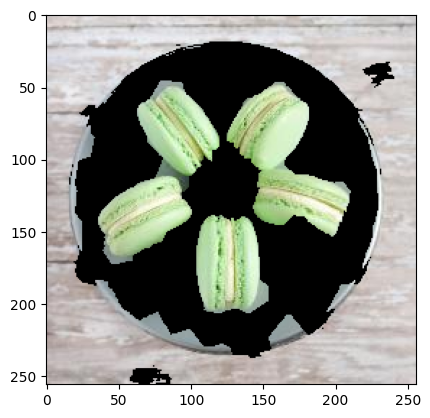

In [ ]:
image_0 = labeled_image == 0
image_0 = np.array(image_0, dtype=np.uint8)
image_0 = np.repeat(image_0[:, :, np.newaxis], 3, axis=2)
image_0 = image_0 * original_image

plt.imshow(image_0)
plt.show()

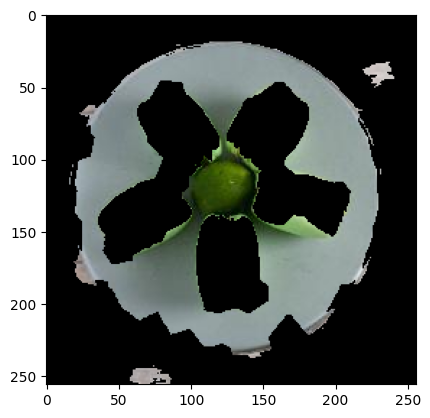

In [ ]:
image_1 = labeled_image == 255
image_1 = np.array(image_1, dtype=np.uint8)
image_1 = np.repeat(image_1[:, :, np.newaxis], 3, axis=2)
image_1 = image_1 * original_image

plt.imshow(image_1)
plt.show()

In [45]:
from skimage.feature import local_binary_pattern

lbp = local_binary_pattern(
    cv2.cvtColor(image_0, cv2.COLOR_RGB2GRAY), 8, 1, method="uniform"
)
hist_lbp, _ = np.histogram(lbp, bins=np.arange(0, 8 + 3), density=True)
hist_lbp

array([0.02781677, 0.05438232, 0.03210449, 0.0790863 , 0.15539551,
       0.09872437, 0.04125977, 0.04997253, 0.39680481, 0.06445312])

In [46]:
lbp = local_binary_pattern(
    cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY), 8, 1, method="uniform"
)
hist_lbp, _ = np.histogram(lbp, bins=np.arange(0, 8 + 3), density=True)
hist_lbp

array([0.01559448, 0.02301025, 0.00907898, 0.03356934, 0.05072021,
       0.07487488, 0.02841187, 0.02975464, 0.70310974, 0.03187561])